<a href="https://colab.research.google.com/github/gabriquaranta/drones-stuff/blob/main/yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## DATASET DOWNLOAD AND PREP

In [2]:
!kaggle datasets download dasmehdixtr/drone-dataset-uav

!mkdir ./datasets
!mkdir ./datasets/train
!mkdir ./datasets/val
!mkdir ./datasets/test

!unzip -q drone-dataset-uav.zip
!rm -rf ./dataset_xml_format/
!rm -rf ./drone-dataset-uav.zip

Dataset URL: https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav
License(s): copyright-authors
100% 716M/716M [00:35<00:00, 23.0MB/s]
100% 716M/716M [00:35<00:00, 21.2MB/s]


In [3]:
import shutil
import os
import random

source_dir = "./drone_dataset_yolo/dataset_txt"
train_dir = "./datasets/train"
val_dir = "./datasets/val"
test_dir = "./datasets/test"

#count txt files in drone_dataset_yoy/dataset_txt
filenames = [f[:-4] for f in os.listdir(source_dir) if f.endswith('.txt')]
n_pics=len(filenames)
print(n_pics)

ids=[i for i in range(n_pics)]
random.shuffle(ids)
#print(ids)

trainratio=0.8
valratio=0.1
testratio=0.1

train_ids=ids[:int(n_pics*trainratio)]
val_ids=ids[int(n_pics*trainratio):int(n_pics*(trainratio+valratio))]
test_ids=ids[int(n_pics*(trainratio+valratio)):]

print(len(train_ids), len(val_ids), len(test_ids))

# check destination directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def copy_files(file_ids, destination):
    missing_files = []
    for i in file_ids:
        txt_src = os.path.join(source_dir, f"{filenames[i]}.txt")
        img_src = os.path.join(source_dir, f"{filenames[i]}.jpg")

        txt_dest = os.path.join(destination, f"{filenames[i]}.txt")
        img_dest = os.path.join(destination, f"{filenames[i]}.jpg")

        # copy only if source file exists
        if os.path.exists(txt_src):
            shutil.copy(txt_src, txt_dest)
        else:
            missing_files.append(txt_src)

        if os.path.exists(img_src):
            shutil.copy(img_src, img_dest)
        else:
            missing_files.append(img_src)

    if missing_files:
        print("Missing files:", missing_files)

# Process train, val, and test sets
copy_files(train_ids, train_dir)
copy_files(val_ids, val_dir)
copy_files(test_ids, test_dir)

1360
1088 136 136
Missing files: ['./drone_dataset_yolo/dataset_txt/classes.jpg']


In [4]:
import yaml

data_yaml = dict(
    train ='train',
    val = 'val',
    test='test',
    nc =1,
    names =['drone']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

%cat data.yaml

{names: [drone], nc: 1, test: test, train: train, val: val}


## SET UP MODEL

In [5]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 294MB/s]


In [6]:
results = model.train(data="data.yaml", epochs=12, imgsz=480)

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=12, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 138MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/train... 1088 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1088/1088 [00:01<00:00, 1042.81it/s]

train: WARNING ⚠️ /content/datasets/train/pic_722.jpg: corrupt JPEG restored and saved
train: New cache created: /content/datasets/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/val... 136 images, 0 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 721.05it/s] 

val: New cache created: /content/datasets/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12      1.44G      1.411      2.032      1.498         42        480: 100%|██████████| 68/68 [00:30<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        136        158      0.673      0.563      0.623      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12      1.36G      1.461      1.596      1.504         43        480: 100%|██████████| 68/68 [00:28<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]


                   all        136        158      0.633      0.547      0.574      0.289
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      1.37G      1.478      1.757      1.615         17        480: 100%|██████████| 68/68 [00:31<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]


                   all        136        158      0.552      0.595      0.534      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12      1.37G      1.473      1.469      1.591         16        480: 100%|██████████| 68/68 [00:29<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]

                   all        136        158      0.663      0.665      0.665      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/12      1.37G      1.432      1.303      1.548         16        480: 100%|██████████| 68/68 [00:27<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        136        158      0.801      0.688       0.77      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/12      1.37G      1.382      1.193      1.499         16        480: 100%|██████████| 68/68 [00:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        136        158      0.731      0.734      0.776      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/12      1.37G      1.317      1.057      1.463         16        480: 100%|██████████| 68/68 [00:27<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        136        158      0.779      0.766      0.816      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/12      1.37G      1.237     0.9703      1.402         16        480: 100%|██████████| 68/68 [00:29<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]

                   all        136        158       0.82      0.809      0.835      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/12      1.37G      1.198     0.8837      1.353         18        480: 100%|██████████| 68/68 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        136        158       0.91      0.834      0.883      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/12      1.37G      1.168     0.8329      1.337         16        480: 100%|██████████| 68/68 [00:26<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all        136        158      0.938      0.864      0.914      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/12      1.37G      1.083     0.7659      1.276         17        480: 100%|██████████| 68/68 [00:30<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        136        158      0.906      0.855      0.908      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/12      1.37G      1.078      0.726      1.259         20        480: 100%|██████████| 68/68 [00:26<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        136        158      0.955      0.867      0.919      0.611



12 epochs completed in 0.109 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


                   all        136        158      0.954      0.867       0.92      0.611
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


#### PLOT SOME VAL IMAGES

./runs/detect/train


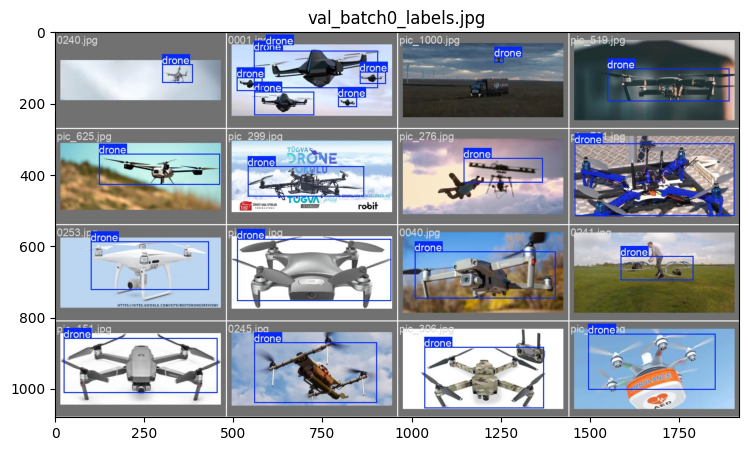

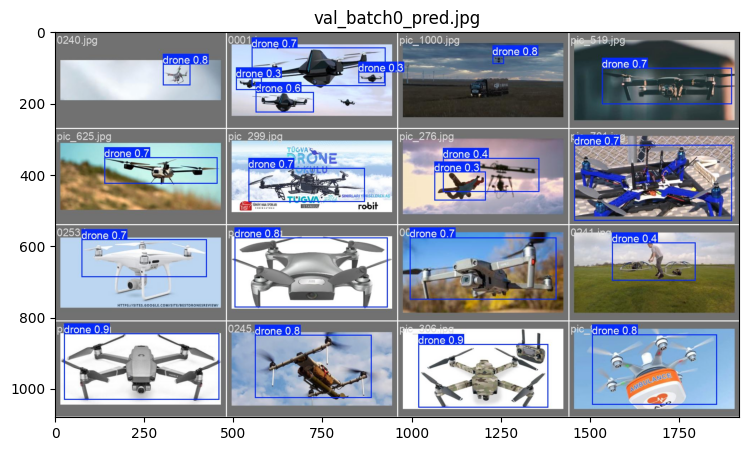

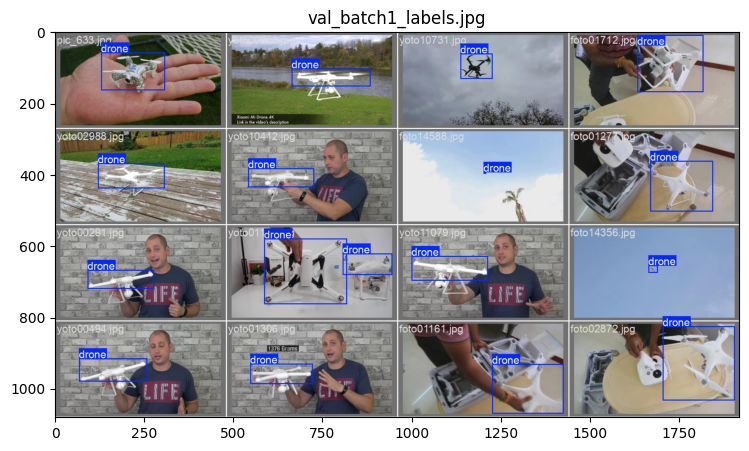

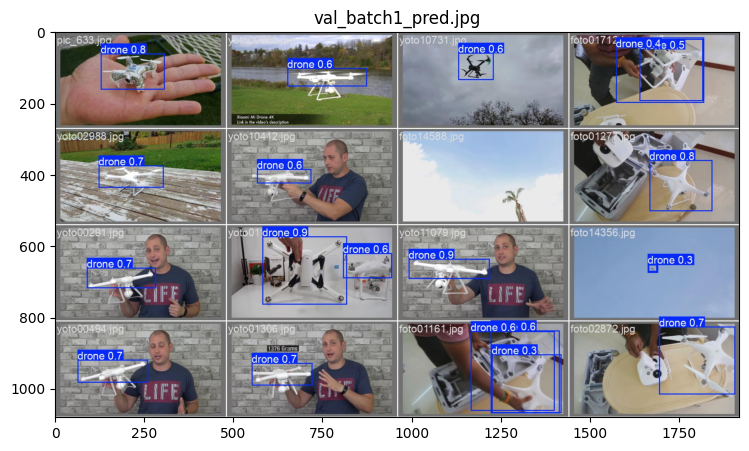

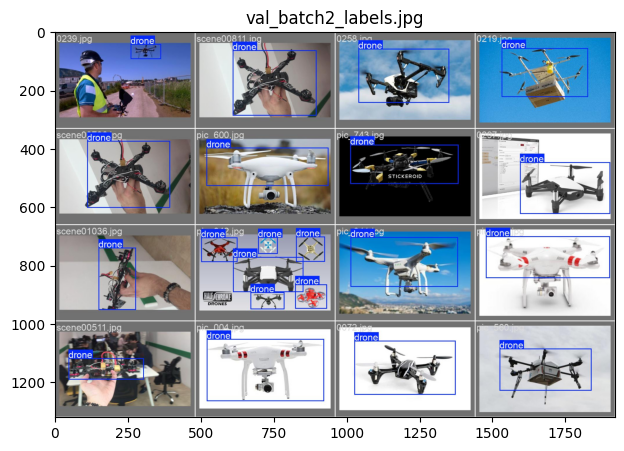

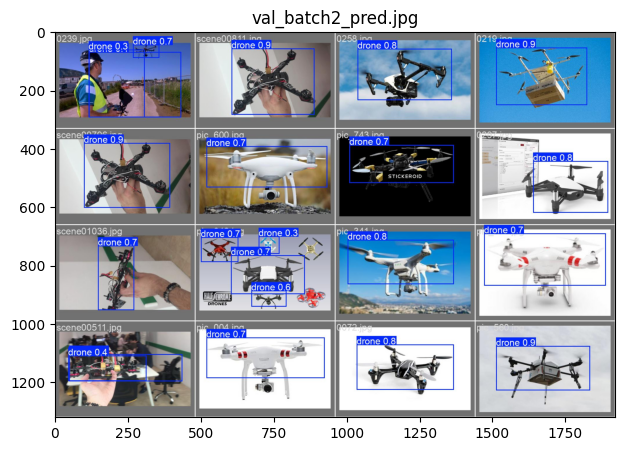

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

rus_outputs='./runs/detect/'
out_dir=os.path.join(rus_outputs,os.listdir(rus_outputs)[0])
print(out_dir)

imgs=[]

for val_res in os.listdir(out_dir):
  if 'val_batch' in val_res:
    imgs.append(val_res)

imgs.sort()
for val_res in imgs:
    image = Image.open(os.path.join(out_dir,val_res))
    image=np.array(image)
    plt.figure(figsize=(10,5))
    plt.title(val_res)
    plt.imshow(image)
    plt.show()




## PREDICT

In [8]:
best_pt=os.path.join(rus_outputs,os.listdir(rus_outputs)[0],'weights/best.pt')
print(best_pt)

best_model=YOLO(best_pt)

predictions=best_model.predict(source='datasets/test', save=True,save_txt=True)

pred_dir=os.path.join(rus_outputs,os.listdir(rus_outputs)[0],'labels')
print(pred_dir)

./runs/detect/train/weights/best.pt

image 1/135 /content/datasets/test/0007.jpg: 288x480 1 drone, 92.2ms
image 2/135 /content/datasets/test/0012.jpg: 192x480 2 drones, 90.1ms
image 3/135 /content/datasets/test/0033.jpg: 288x480 1 drone, 17.1ms
image 4/135 /content/datasets/test/0056.jpg: 480x480 1 drone, 18.4ms
image 5/135 /content/datasets/test/0089.jpg: 288x480 1 drone, 19.3ms
image 6/135 /content/datasets/test/0094.jpg: 288x480 1 drone, 16.2ms
image 7/135 /content/datasets/test/0229.jpg: 288x480 1 drone, 17.2ms
image 8/135 /content/datasets/test/0267.jpg: 256x480 1 drone, 84.9ms
image 9/135 /content/datasets/test/0280.jpg: 192x480 1 drone, 18.3ms
image 10/135 /content/datasets/test/0304.jpg: 320x480 1 drone, 79.5ms
image 11/135 /content/datasets/test/foto01480.jpg: 288x480 1 drone, 14.3ms
image 12/135 /content/datasets/test/foto01509.jpg: 288x480 1 drone, 13.8ms
image 13/135 /content/datasets/test/foto04670.jpg: 288x480 1 drone, 13.1ms
image 14/135 /content/datasets/test/foto04699.

In [9]:
labels_dir='./drone_dataset_yolo/dataset_txt'

# intersection over inion
ious=[]

for res in os.listdir(pred_dir):
  if res in os.listdir(labels_dir):
    pred_file=os.path.join(pred_dir,res)
    labels_file=os.path.join(labels_dir,res)

    pred_lines=open(pred_file,'r').readlines()
    labels_lines=open(labels_file,'r').readlines()

    for pred_line in pred_lines:
      pred_line_split=pred_line.split(' ')

      pred_x1=float(pred_line_split[1])
      pred_y1=float(pred_line_split[2])
      pred_x2=float(pred_line_split[3])
      pred_y2=float(pred_line_split[4])

      iou=0.0
      for labels_line in labels_lines:
        labels_line_split=labels_line.split(' ')
        labels_x1=float(labels_line_split[1])
        labels_y1=float(labels_line_split[2])
        labels_x2=float(labels_line_split[3])
        labels_y2=float(labels_line_split[4])

      intersection=max(0,min(pred_x2,labels_x2)-max(pred_x1,labels_x1))*max(0,min(pred_y2,labels_y2)-max(pred_y1,labels_y1))
      union=(pred_x2-pred_x1)*(pred_y2-pred_y1)+(labels_x2-labels_x1)*(labels_y2-labels_y1)-intersection
      iou=intersection/union
      ious.append(iou)

print(len(ious))
print(ious)
print(sum(ious)/len(ious))
print(len([i for i in ious if i>0.5]))
print(len([i for i in ious if i>0.75]))


171
[0.0, 0.0, 0.589851578525077, 0.7700715314716691, 0.3605973475446932, 0.0, -0.0, 0.6174839307148674, -0.0, 0.2702377390022092, 0.7264069490833336, 0.7089274219312285, 0.0, 0.0, 0.0, 0.8298708081274685, 0.39656731323618916, -0.0, 0.898657556228763, 0.6501583038373222, -0.0, 0.623737283104843, 0.0, 0.7319194692955577, 0.0, 0.7216243277470471, 0.7556460334381979, 0.5536868273720061, 0.9389768957580071, 0.6212020964766476, 0.0, 0.0, 0.0, -0.0, 0.8061034507016145, -0.0, -0.0, 0.8169151774810566, 0.5174532898763076, 0.7242595875769043, 0.22875573365490723, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5135518386745788, 0.0, 0.0, 0.0, 0.0, 0.33265244792183324, 0.6028178974698662, 0.6450476417315693, 0.817236934545961, -0.0, 0.9206065083897915, 0.5964469337604428, 0.7469402327911886, -0.0, -0.0, 0.0, 0.35856343445646754, -0.0, 0.0, 0.2090003397993657, -0.0, 0.6499401773374405, -0.0, 0.7647532947143143, 0.0, 0.0, 0.7472066352441683, 0.0, 0.0, 0.4721983684864497, 0.5807702915258766, -0.0, 0.6230178486057901, 0

In [10]:
iou_threshold = 0.5  # Adjust as needed
accurate_predictions = len([iou for iou in ious if iou > iou_threshold])
accuracy = accurate_predictions / len(ious) if len(ious) > 0 else 0

print(f"accuracy (iou > {iou_threshold}): {accuracy}")

import os

pred_dir = os.path.join('./runs/detect', os.listdir('./runs/detect')[0], 'labels')
labels_dir = './drone_dataset_yolo/dataset_txt'

correct_predictions = 0

for res in os.listdir(pred_dir):
    if res in os.listdir(labels_dir):
        correct_predictions += 1

print(f"\ntimes a drone was correctly predicted to be present (regardless of iou): {correct_predictions}")

accuracy (iou > 0.5): 0.29239766081871343

times a drone was correctly predicted to be present (regardless of iou): 134
